<a href="https://colab.research.google.com/github/menakag878-lgtm/ML-model/blob/main/MLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [17]:
from google.colab import files

In [18]:
files.upload()

Saving PROJECTFILE.xlsx to PROJECTFILE.xlsx


{'PROJECTFILE.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xebz\xd2\x93b\x01\x00\x00\x90\x04\x00\x00\x13\x00\xdc\x01[Content_Types].xml \xa2\xd8\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [20]:
df = pd.read_excel(r"PROJECTFILE.xlsx")

Loaded dataframe shape: (4999, 11)
Columns: ['hash', 't_0', 't_1', 't_2', 't_3', 't_4', 't_5', 't_6', 't_7', 't_8', 't_9']
Fraction numeric in t_4: 0.998
After cleaning, dataframe shape: (4987, 12)
Classes with count < 2 (to merge): ['275', '110', '54', '285', '76', '280', '258', '178', '25', '39']...
Final class counts (top 10):
__label_num__
117          1934
274          1323
240           570
172           443
208           295
215            46
70             38
65             31
__OTHER__      29
297            21
Name: count, dtype: int64
Train/test sizes: 3989 998

Test accuracy: 0.8206

Top 20 labels shown: ['117', '274', '240', '172', '208', '215', '70', '65', '__OTHER__', '297', '158', '286', '82', '81', '95', '260', '112', '16', '60', '228']


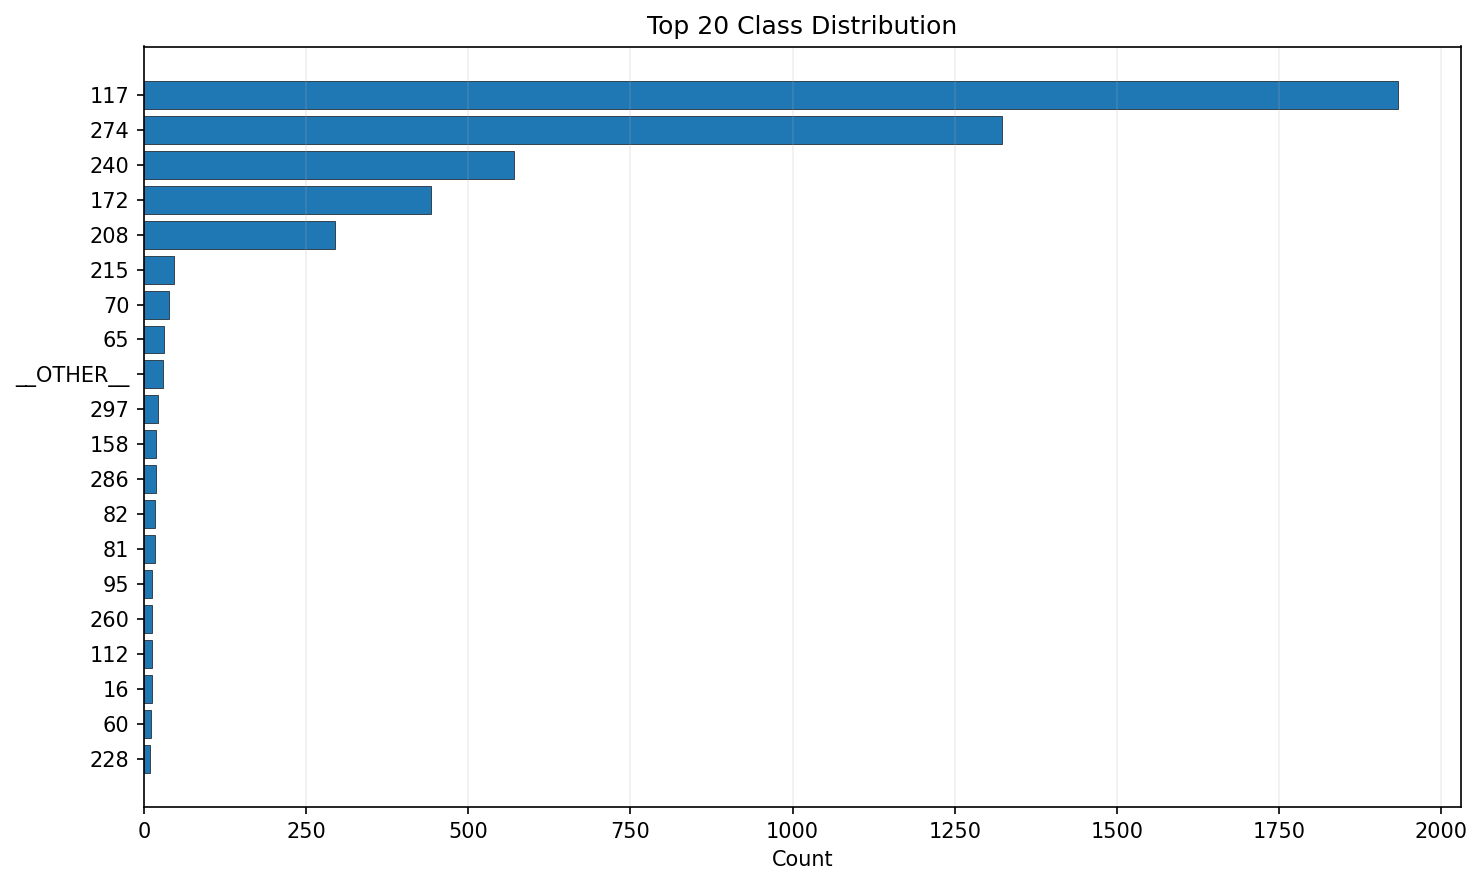


Test samples in top-20 labels: 976 / 998


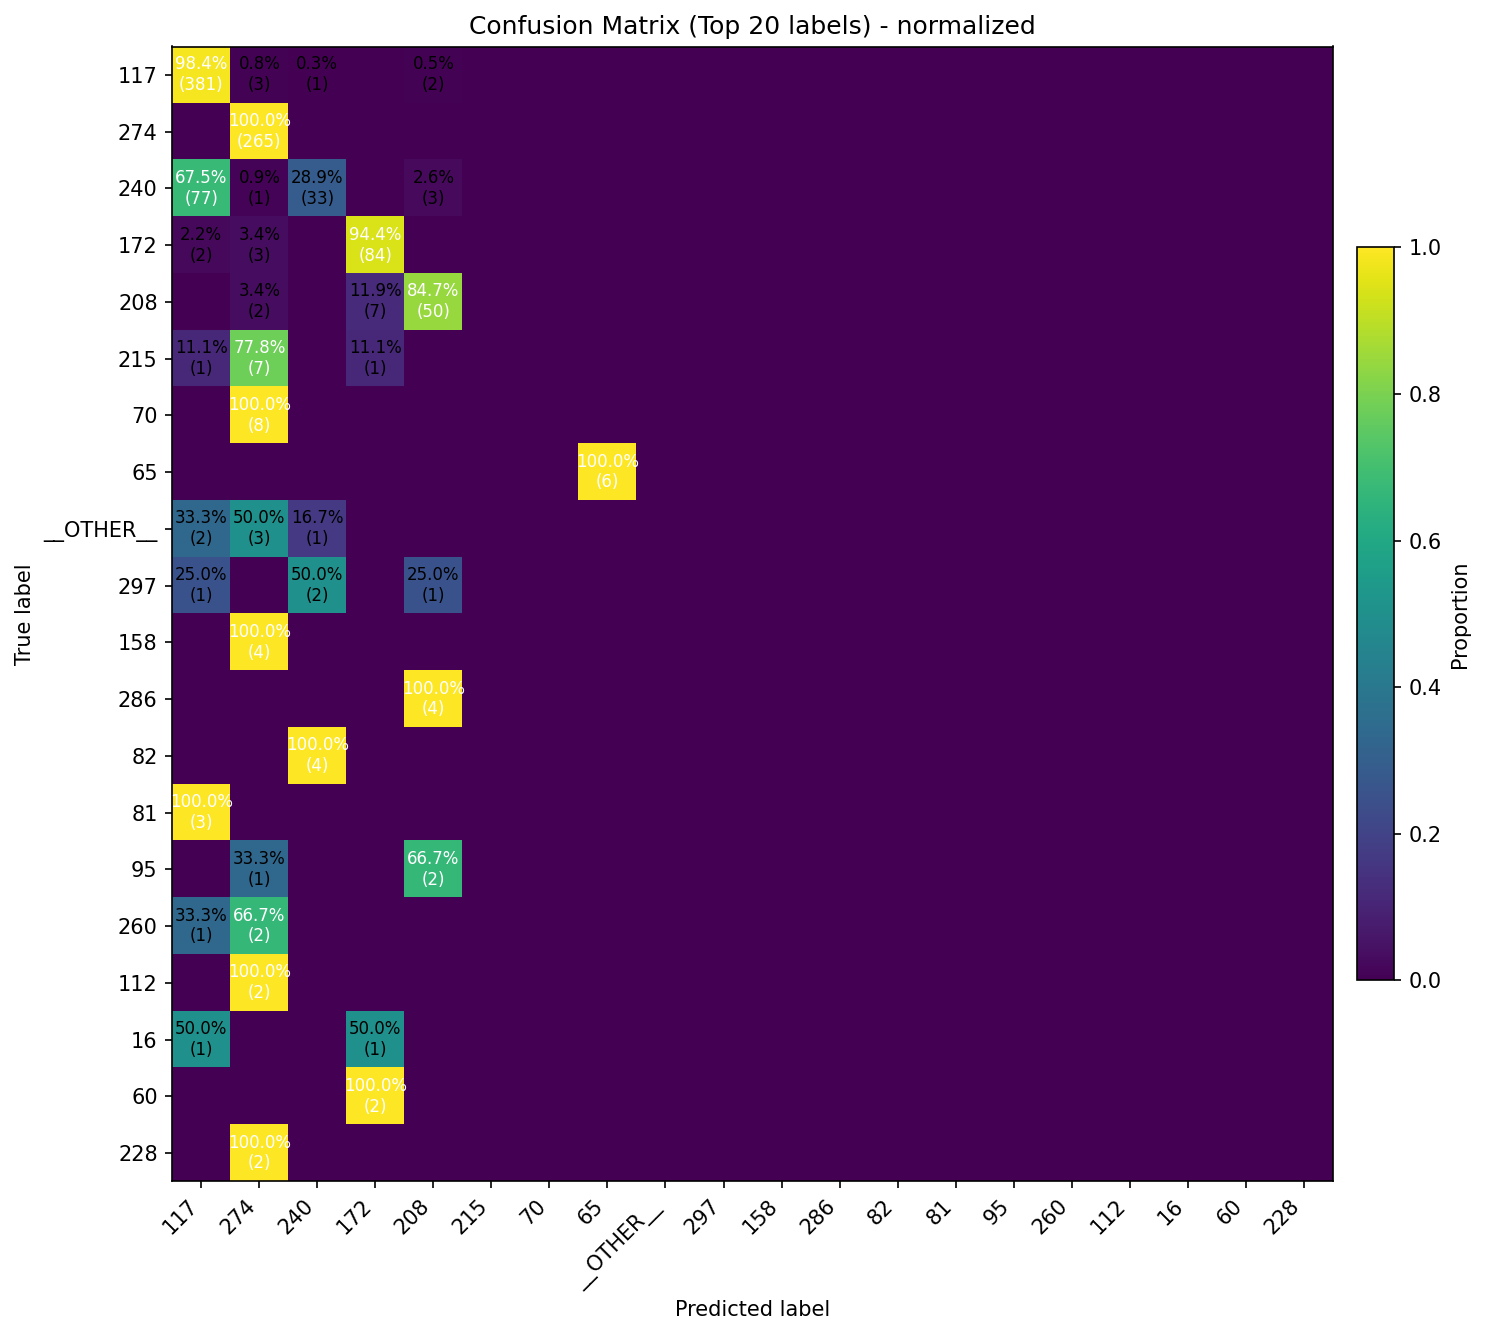


Classification report (restricted to shown labels):

              precision    recall  f1-score   support

         117       0.81      0.98      0.89       387
         274       0.87      1.00      0.93       265
         240       0.80      0.29      0.43       114
         172       0.88      0.94      0.91        89
         208       0.81      0.85      0.83        59
         215       0.00      0.00      0.00         9
          70       0.00      0.00      0.00         8
          65       1.00      1.00      1.00         6
   __OTHER__       0.00      0.00      0.00         6
         297       0.00      0.00      0.00         4
         158       0.00      0.00      0.00         4
         286       0.00      0.00      0.00         4
          82       0.00      0.00      0.00         4
          81       0.00      0.00      0.00         3
          95       0.00      0.00      0.00         3
         260       0.00      0.00      0.00         3
         112       0.00    

In [34]:
# -------------------------
# FULL CLEAN PIPELINE CELL
# -------------------------
# Reads Excel, merges rare classes (Option A), trains MultinomialNB on TF-IDF of concatenated features,
# and plots a clean top-k distribution + readable confusion matrix (normalized).
#
# Paste this whole cell and run it.
# -------------------------

# Optional: uncomment to install missing packages in some environments
# !pip install -q scikit-learn pandas matplotlib openpyxl

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------- USER CONFIG --------------
file_path = "PROJECTFILE.xlsx"   # change if your file name/path differs
label_col = "t_4"       # label column name in your dataset
min_count = 2                 # Option A: minimum samples per class for stratify
top_k = 20                    # how many classes to show in plots
save_images = False           # set True to save PNG files
# -----------------------------------------

# -------------- Load data --------------
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path} (update file_path variable).")

df = pd.read_excel(file_path)
print("Loaded dataframe shape:", df.shape)
print("Columns:", list(df.columns))

if label_col not in df.columns:
    raise KeyError(f"Label column '{label_col}' not found in dataframe.")

# -------------- Label handling (Option A) --------------
# Try convert label to numeric if majority numeric, otherwise keep as strings
converted = pd.to_numeric(df[label_col], errors='coerce')
frac_numeric = converted.notna().sum() / len(df)
print(f"Fraction numeric in {label_col}: {frac_numeric:.3f}")

if frac_numeric >= 0.9:
    # treat numeric but keep as string categories (so LabelEncoder is consistent)
    df["__label_num__"] = converted.astype("Int64")
    df = df.dropna(subset=["__label_num__"])
    y_all = df["__label_num__"].astype(str)
else:
    df = df.dropna(subset=[label_col])
    y_all = df[label_col].astype(str)

print("After cleaning, dataframe shape:", df.shape)

# -------------- Features --------------
# Drop label columns, keep whatever remains as features.
drop_cols = [label_col]
if "__label_num__" in df.columns:
    drop_cols.append("__label_num__")
X = df.drop(columns=drop_cols, errors="ignore")

if X.shape[1] == 0:
    raise ValueError("No feature columns remain after dropping the label. Ensure dataset has features.")

# Convert each row to a single string for TF-IDF
X_text = X.astype(str).agg(" ".join, axis=1)

# -------------- Merge rare classes (Option A) --------------
counts = y_all.value_counts()
small_classes = counts[counts < min_count].index.tolist()
print(f"Classes with count < {min_count} (to merge): {small_classes[:10]}{'...' if len(small_classes)>10 else ''}")

if small_classes:
    y_merged = y_all.replace({c: "__OTHER__" for c in small_classes})
    # If __OTHER__ still too small, drop those rows
    if y_merged.value_counts().get("__OTHER__", 0) < min_count:
        drop_mask = y_merged == "__OTHER__"
        n_drop = drop_mask.sum()
        print(f"Dropping {n_drop} rows because __OTHER__ has <{min_count} samples.")
        X_text = X_text[~drop_mask]
        y_merged = y_merged[~drop_mask]
else:
    y_merged = y_all.copy()

print("Final class counts (top 10):")
print(y_merged.value_counts().head(10))

# -------------- Train/test split (stratified) --------------
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y_merged, test_size=0.2, random_state=42, stratify=y_merged
)

print("Train/test sizes:", X_train_text.shape[0], X_test_text.shape[0])

# -------------- Vectorize and train --------------
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train_enc)

pred_enc = model.predict(X_test_vec)
pred_labels = le.inverse_transform(pred_enc)

acc = accuracy_score(y_test_enc, pred_enc)
print(f"\nTest accuracy: {acc:.4f}")

# -------------- Clean Top-K Class Distribution plot --------------
label_counts = pd.Series(y_merged).value_counts()
top_labels = label_counts.head(top_k).index.tolist()
print(f"\nTop {top_k} labels shown: {top_labels}")

plt.figure(figsize=(10,6), dpi=150)
plt.barh(range(len(top_labels)), label_counts[top_labels].values, color="tab:blue", edgecolor="black", linewidth=0.3)
plt.yticks(range(len(top_labels)), top_labels)
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.title(f"Top {top_k} Class Distribution")
plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
if save_images:
    plt.savefig(f"top_{top_k}_class_distribution.png", dpi=150, bbox_inches="tight")
plt.show()

# -------------- Confusion matrix restricted to top_k --------------
y_test_arr = np.array(y_test).astype(str)
pred_arr = np.array(pred_labels).astype(str)

mask = np.isin(y_test_arr, top_labels)
y_true_top = y_test_arr[mask]
y_pred_top = pred_arr[mask]

print(f"\nTest samples in top-{top_k} labels: {len(y_true_top)} / {len(y_test_arr)}")

if len(y_true_top) == 0:
    print("No test samples for the chosen top_k. Increase top_k or retrain.")
else:
    cm = confusion_matrix(y_true_top, y_pred_top, labels=top_labels)
    # normalize rows
    with np.errstate(all="ignore"):
        cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
    cm_norm = np.nan_to_num(cm_norm)

    plt.figure(figsize=(10,9), dpi=150)
    im = plt.imshow(cm_norm, interpolation="nearest", cmap="viridis", aspect="auto")
    plt.colorbar(im, fraction=0.03, pad=0.02, label="Proportion")
    tick_pos = np.arange(len(top_labels))
    plt.xticks(tick_pos, top_labels, rotation=45, ha="right")
    plt.yticks(tick_pos, top_labels)
    plt.title(f"Confusion Matrix (Top {top_k} labels) - normalized")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    # annotate cells
    for i in range(cm_norm.shape[0]):
        for j in range(cm_norm.shape[1]):
            v = cm_norm[i, j]
            if v > 0:
                plt.text(j, i, f"{v*100:.1f}%\n({cm[i,j]})",
                         ha="center", va="center",
                         color="white" if v > 0.5 else "black", fontsize=8)

    plt.tight_layout()
    if save_images:
        plt.savefig(f"confusion_top_{top_k}.png", dpi=150, bbox_inches="tight")
    plt.show()

    # -------------- Classification report for shown labels --------------
    print("\nClassification report (restricted to shown labels):\n")
    print(classification_report(y_true_top, y_pred_top, labels=top_labels, zero_division=0))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ran

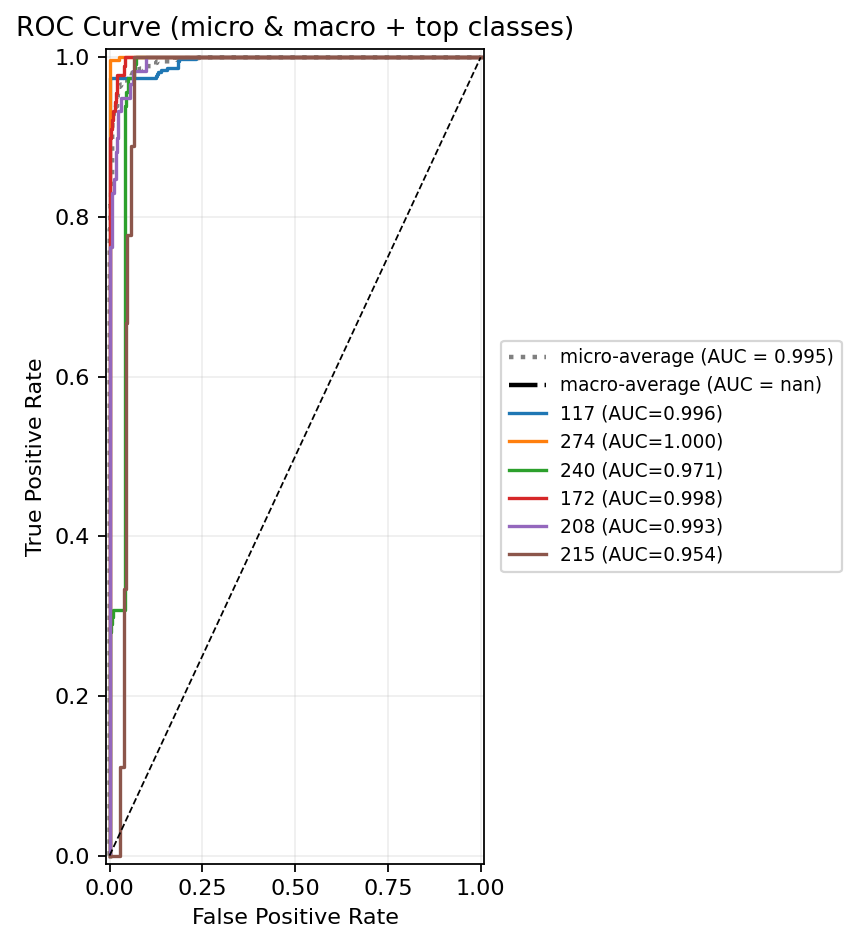

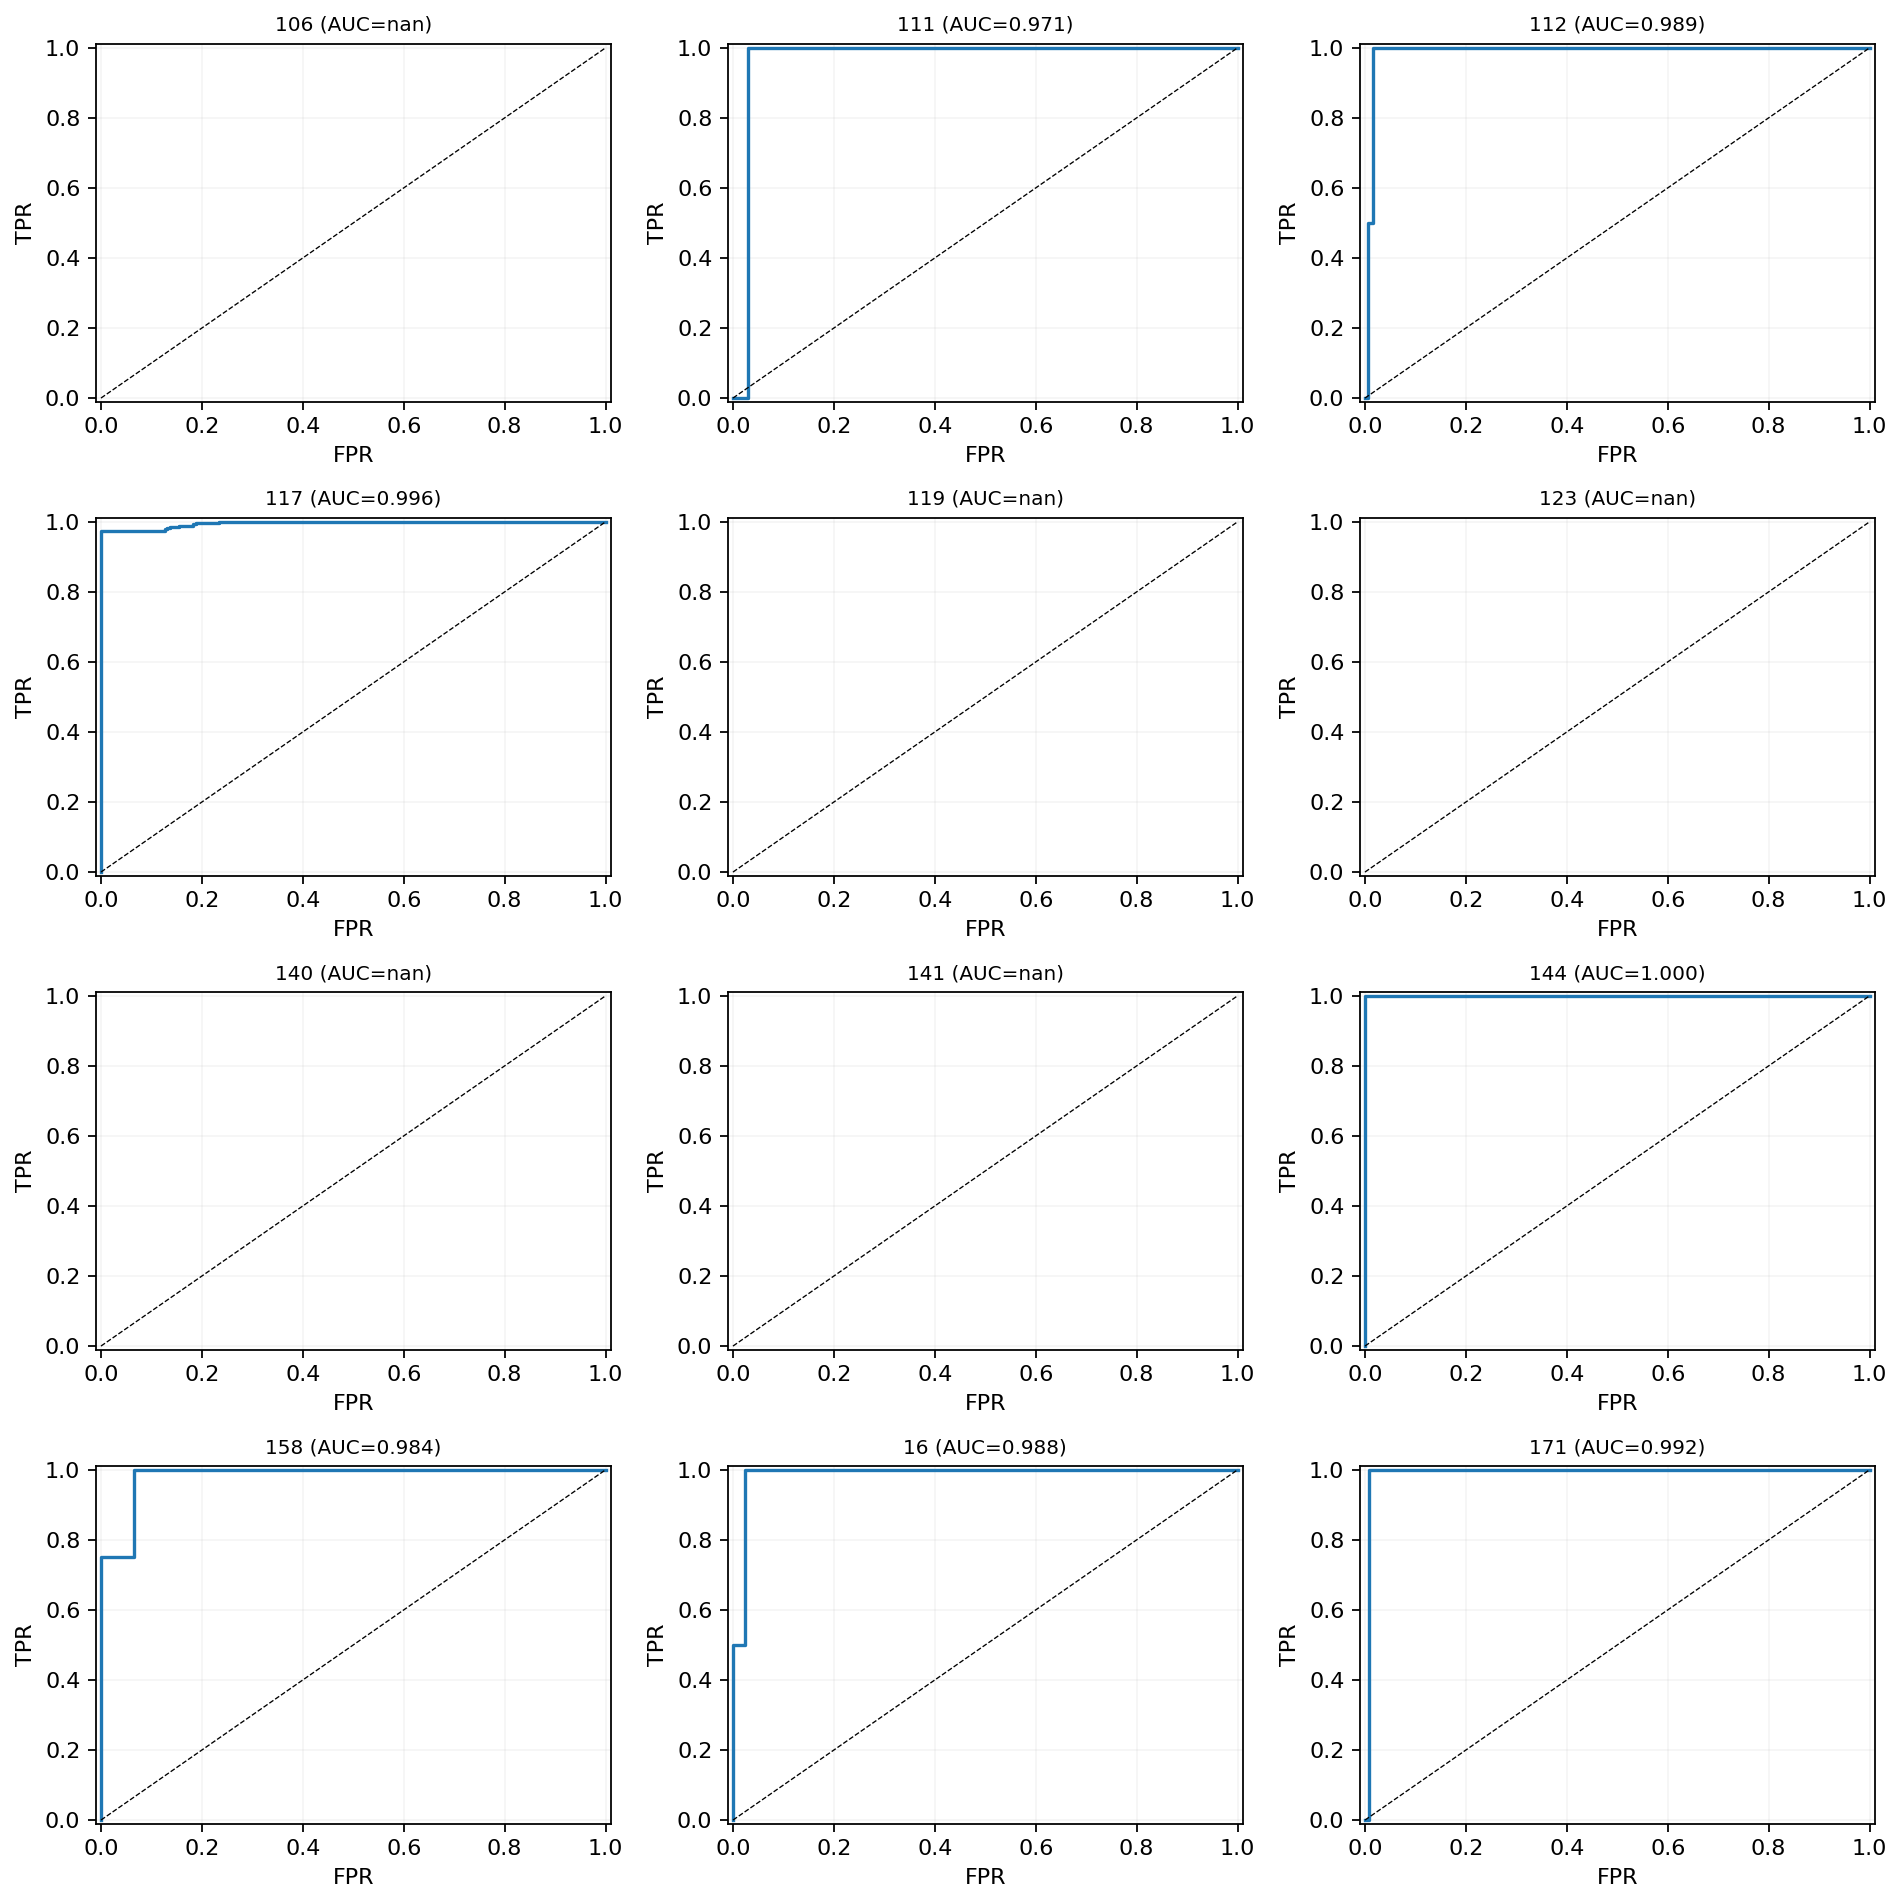

Saved files: clean_roc_main.png, clean_roc_per_class_grid.png


In [35]:
# ---- Clean ROC plotting: binary & multiclass (One-vs-Rest) ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# -------- Config --------
main_dpi = 160
main_figsize = (7, 6)
perclass_figsize = (10, 8)        # only used when saving separate per-class grid
max_lines = 6                     # maximum individual class curves to draw on main plot (besides micro/macro)
max_grid = 12                     # max classes to show in grid of small ROC plots (increase if you want many small plots)
save_png = True
prefix = "clean_roc"
linewidth = 2.0

# -------- Prepare inputs (make robust) --------
# X_test_text : pandas Series or list of raw text rows used for test
# y_test : array-like of true labels (strings or ints)
# model, vectorizer : trained objects

# Ensure y_test is numpy array of strings
y_test_arr = np.array(y_test).astype(str)

# ensure label encoder exists or create from model / y_train/le if available
try:
    classes = list(le.classes_)
except Exception:
    # Build LabelEncoder from union of y_test and any classes learned by the model if possible
    le = LabelEncoder()
    le.fit(y_test_arr)   # minimal fallback
    classes = list(le.classes_)

n_classes = len(classes)
if n_classes < 2:
    raise ValueError("Need at least 2 classes to compute ROC.")

# Vectorize test set
X_test_vec = vectorizer.transform(X_test_text)

# ---------- get score matrix (n_samples, n_classes) ----------
scores = None
# prefer predict_proba
if hasattr(model, "predict_proba"):
    try:
        scores = model.predict_proba(X_test_vec)
    except Exception:
        scores = None
# fallback to decision_function
if scores is None and hasattr(model, "decision_function"):
    dec = model.decision_function(X_test_vec)
    # decision_function shapes vary; convert to (n_samples, n_classes) if binary
    if dec.ndim == 1:
        dec = np.vstack([-dec, dec]).T
    scores = dec

if scores is None:
    raise RuntimeError("Model lacks predict_proba and decision_function — cannot compute ROC.")

# If scores columns don't match classes count, attempt safe adjustment
if scores.shape[1] != n_classes:
    # try to align if LabelEncoder was used when training (common case)
    # Otherwise, if fewer columns, pad with very small values (so ROC can still compute)
    if scores.shape[1] < n_classes:
        pad = np.zeros((scores.shape[0], n_classes - scores.shape[1]))
        scores = np.hstack([scores, pad])
    else:
        # More score columns than classes: truncate to n_classes
        scores = scores[:, :n_classes]

# Binarize y_test to shape (n_samples, n_classes) in label-encoder order
y_test_bin = label_binarize(y_test_arr, classes=classes)

# ---------- compute per-class ROC and AUC ----------
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    try:
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    except ValueError:
        # if a class has no positive samples in y_test_bin[:,i], set empty arrays
        fpr[i], tpr[i], roc_auc[i] = np.array([0.0, 1.0]), np.array([0.0, 1.0]), 0.0

# micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# macro-average (interpolated)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# ---------- Choose top classes to show (by support in y_test) ----------
# show top by test-sample counts, to focus on meaningful curves
test_counts = pd.Series(y_test_arr).value_counts()
top_classes = test_counts.nlargest(max_lines).index.astype(str).tolist()
# Ensure they are in label encoder order for consistency
top_indices = [classes.index(c) for c in top_classes if c in classes]

# ---------- Main ROC plot (micro, macro, + up to max_lines class curves) ----------
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=main_figsize, dpi=main_dpi)
plt.plot(fpr["micro"], tpr["micro"],
         label=f"micro-average (AUC = {roc_auc['micro']:.3f})",
         linestyle=':', linewidth=linewidth, color='gray')
plt.plot(fpr["macro"], tpr["macro"],
         label=f"macro-average (AUC = {roc_auc['macro']:.3f})",
         linestyle='-.', linewidth=linewidth, color='black')

colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive'])
for idx, color in zip(top_indices, colors):
    plt.plot(fpr[idx], tpr[idx], lw=1.5, color=color,
             label=f"{classes[idx]} (AUC={roc_auc[idx]:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=0.8)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (micro & macro + top classes)')
# place legend outside to the right
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='small')
plt.grid(alpha=0.2)
plt.tight_layout(rect=(0,0,0.78,1))   # leave room on right for legend
if save_png:
    plt.savefig(f"{prefix}_main.png", dpi=main_dpi, bbox_inches='tight')
plt.show()

# ---------- Optional: Per-class small subplot grid for more detail (up to max_grid) ----------
import math, pandas as pd
n_show = min(n_classes, max_grid)
cols = 3
rows = math.ceil(n_show / cols)
plt.figure(figsize=(cols*4, rows*3), dpi=main_dpi)
for i in range(n_show):
    plt.subplot(rows, cols, i+1)
    plt.plot(fpr[i], tpr[i], lw=1.5)
    plt.plot([0, 1], [0, 1], 'k--', lw=0.6)
    plt.xlim([-0.01,1.01]); plt.ylim([-0.01,1.01])
    auc_i = roc_auc.get(i, 0.0)
    plt.title(f"{classes[i]} (AUC={auc_i:.3f})", fontsize=9)
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.grid(alpha=0.12)
plt.tight_layout()
if save_png:
    plt.savefig(f"{prefix}_per_class_grid.png", dpi=main_dpi, bbox_inches='tight')
plt.show()

print("Saved files:" + (f" {prefix}_main.png, {prefix}_per_class_grid.png" if save_png else " (not saving)"))